<a href="https://colab.research.google.com/github/tiasaxena/ML-Notebooks/blob/main/Linear_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Linear Regression Implementation**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

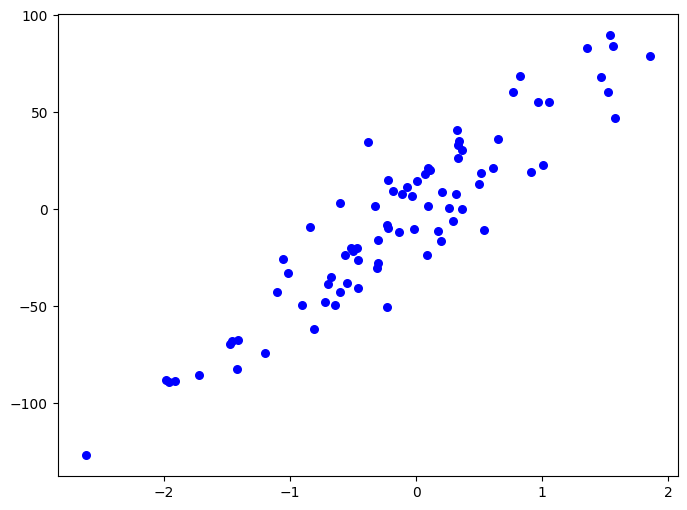

(100, 1)

In [ ]:
X, y = make_regression(n_samples=100,
                       n_features=1,
                       noise=20,
                       random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig = plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color="b", marker="o", s=30), # s is the size
plt.show()
X.shape

In [ ]:
class LinearRegression:
  def __init__(self, lr=0.01, n_iterations=1000):
    self.lr = lr
    self.n_iterations = n_iterations
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    # init parameters
    n_samples, n_features = X.shape
    # no. of weights == no. of features in the input layer(1) * no. of nodes in the hidden/output layer(1)
    self.weight = np.zeros(n_features)
    # no. of biases = no. of nodes in hidden layer(0) + no. of nodes in the output layer(1)
    self.bias = 0

    # Gradient Descent
    for _ in range(self.n_iterations):
      y_predictions = np.dot(X, self.weight) + self.bias
      dw = (1 / n_samples) * np.dot(X.T, (y_predictions - y))
      db = (1 / n_samples) * np.sum(y_predictions - y)

      self.weight -= self.lr * dw
      self.bias -= self.lr * db

  def predict(self, X):
    y_predictions = np.dot(X, self.weight) + self.bias
    return y_predictions

  def mse(self, y_true, y_preds):
    return np.mean((y_true - y_preds) ** 2)

Mean Square Loss: 416.96213538809917


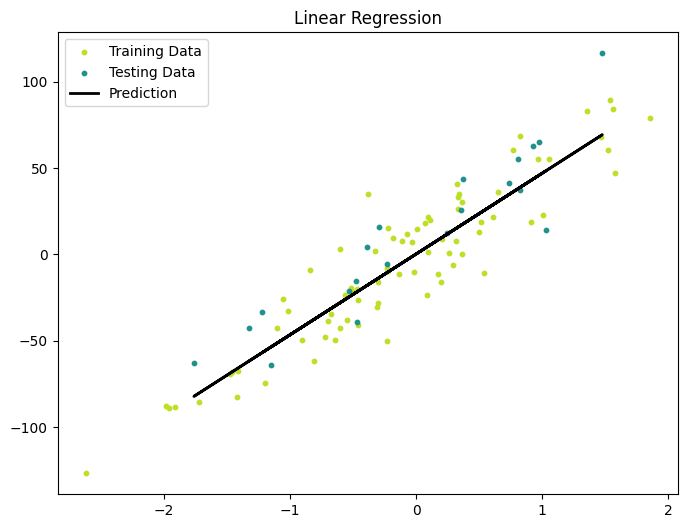

In [ ]:
model = LinearRegression(lr=0.1, n_iterations=100)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f"Mean Square Loss: {model.mse(y_test, predictions)}")

# Visualize
cmap = plt.get_cmap('viridis')
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color=cmap(0.9), s=10, label="Training Data")
plt.scatter(X_test, y_test, color=cmap(0.5), s=10, label = "Testing Data")
plt.title("Linear Regression")
plt.plot(X_test, predictions, color='black', linewidth=2, label='Prediction')
plt.legend()
plt.show()